In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
torch.set_default_tensor_type(torch.DoubleTensor)

from scipy.special import logsumexp,erf

from itertools import product
from itertools import combinations
import pickle

from io import StringIO
from Bio import Phylo

from tree_torch import Tree
from SLCVI_torch import SLCVI

import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy

np.random.seed(0)

/Users/evsi8432/opt/anaconda3/lib/python3.9/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)
/Users/evsi8432/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print(torch.__version__)

2.2.2


In [4]:
pop_size = 5.0 # exponential parameter for constant pop size prior
data_file = '../dat/DS1/DS1.pickle'

In [5]:
with open(data_file, 'rb') as f:
    DS1 = pickle.load(f)

In [6]:
genomes = []
species = []
for key in DS1:
    genomes.append(DS1[key])
    species.append(key)
    
n_species = len(species)

In [7]:
n_species = 3
genome_size = 100
genomes = ['']*n_species
ps = [[0.9,0.01,0,0,0.09],
      [0.9,0.1,0,0,0.0],
      [0.9,0.1,0,0,0.0]]
for _ in range(genome_size):
    for s in range(n_species):
        genomes[s] += np.random.choice(['A','T','G','C','-'],p=ps[s])
        
#genomes = [["A"],["T"],["C"]]

In [8]:
# From https://github.com/zcrabbit/vbpi-torch/blob/ff86cf0c47a5753f5cc5b4dfe0b6ed783ab22669/unrooted/phyloModel.py#L7-L11
nuc2vec = {'A':[1.,0.,0.,0.], 'G':[0.,1.,0.,0.], 'C':[0.,0.,1.,0.], 'T':[0.,0.,0.,1.],
           '-':[1.,1.,1.,1.], '?':[1.,1.,1.,1.], 'N':[1.,1.,1.,1.], 'R':[1.,1.,0.,0.],
           'Y':[0.,0.,1.,1.], 'S':[0.,1.,1.,0.], 'W':[1.,0.,0.,1.], 'K':[0.,1.,0.,1.],
           'M':[1.,0.,1.,0.], 'B':[0.,1.,1.,1.], 'D':[1.,1.,0.,1.], 'H':[1.,0.,1.,1.],
           'V':[1.,1.,1.,0.], '.':[1.,1.,1.,1.], 'U':[0.,0.,0.,1.]}

tree_log_probs = torch.tensor([[nuc2vec[g] for g in genome] for genome in genomes],
                                dtype = float)
tree_log_probs = torch.log(tree_log_probs)

# Set initial $\theta$ randomly

In [9]:
theta = torch.zeros((2,n_species,n_species))

#theta[0] = torch.normal(mean=0.0,std=1.0,size = (n_species,n_species)) + np.log(pop_size)
#theta[0] = theta[0]*torch.tril(torch.ones((n_species,n_species)),diagonal=-1)
#theta[1] = 0.01*torch.normal(mean=0.0,std=1.0,size = (n_species,n_species))
#theta[1] = theta[1]*torch.tril(torch.ones((n_species,n_species)),diagonal=-1)

print(theta)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


In [10]:
Z = torch.normal(torch.ones_like(theta[0]))
log_times = torch.exp(theta[1])*Z+theta[0]
log_times = log_times + torch.triu(torch.ones_like(theta[0])*np.inf)

tree = Tree(theta,log_times,tree_log_probs,
            pop_size=pop_size)

print(tree.log_like)
print(tree.log_prior)
print(tree.log_q)

tensor(-400.6373)
tensor(-6.1703)
tensor(-10.3593)


# Do Variational Inference

In [11]:
genomes

['AAAAAAAAA-AAAAAAAAAAAAAA-AAAAAAAAAAAAAAAAAAAAAAAA-AAAAAAAAA-AAAAAAAAAA-AAAA--AAAAAAAAA-AAA---AAAAAAA',
 'AAAATAAAAAAAAAAAATAAAAATAAAAAAAAAATATAAAAAAAAAAAAAAAAAAAAAAAATAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAT',
 'AATAAATAAAAATAAAAAAAAAAAAAAAATAAAAAAAAAATAAAAAAAATAAAATAAAAAAAAAAAAAAAAAAAAAAAAAAAATTAATAAATAAAAAAAT']

iteration:  0
runtime: 0 mins
step size:  0.01
grad_norm estimate:  34.91618940995556
ELBO estimate:  -332.80592960466186

iteration:  10
runtime: 0 mins
step size:  0.01
grad_norm estimate:  38.841315522849115
ELBO estimate:  -320.88970371164413

iteration:  20
runtime: 0 mins
step size:  0.01
grad_norm estimate:  41.6203162207971
ELBO estimate:  -307.9445009998107

iteration:  30
runtime: 0 mins
step size:  0.01
grad_norm estimate:  25.697267125005435
ELBO estimate:  -303.22873385912936

iteration:  40
runtime: 0 mins
step size:  0.01
grad_norm estimate:  26.225776468161374
ELBO estimate:  -311.32376943626025

iteration:  50
runtime: 0 mins
step size:  0.01
grad_norm estimate:  24.43599160219865
ELBO estimate:  -304.1477475632866

iteration:  60
runtime: 0 mins
step size:  0.01
grad_norm estimate:  31.399194176136767
ELBO estimate:  -299.82622748688806

iteration:  70
runtime: 0 mins
step size:  0.01
grad_norm estimate:  23.024792092762716
ELBO estimate:  -293.96313605006526

iterati

iteration:  660
runtime: 0 mins
step size:  0.01
grad_norm estimate:  1.8947147038113876
ELBO estimate:  -239.53780651163527

iteration:  670
runtime: 0 mins
step size:  0.01
grad_norm estimate:  3.6527994802483277
ELBO estimate:  -239.51761807317365

iteration:  680
runtime: 0 mins
step size:  0.01
grad_norm estimate:  3.0259158997020377
ELBO estimate:  -239.5176627088207

iteration:  690
runtime: 0 mins
step size:  0.01
grad_norm estimate:  2.4667577275824235
ELBO estimate:  -239.33671807170504

iteration:  700
runtime: 0 mins
step size:  0.01
grad_norm estimate:  3.345752122004676
ELBO estimate:  -239.4223181584219

iteration:  710
runtime: 0 mins
step size:  0.01
grad_norm estimate:  2.9202408614000124
ELBO estimate:  -239.42192994294516

iteration:  720
runtime: 0 mins
step size:  0.01
grad_norm estimate:  0.8000289932564806
ELBO estimate:  -239.24803435162985

iteration:  730
runtime: 0 mins
step size:  0.01
grad_norm estimate:  1.3863048123883837
ELBO estimate:  -239.43202529418

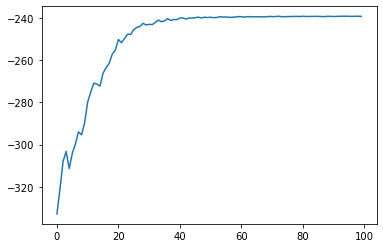

In [12]:
optim_reparam = SLCVI(tree_log_probs,deepcopy(theta),pop_size)
optim_reparam.learn(batch_size=10,
                      iters=1000,
                      alpha=0.01,
                      method="reparam",
                      record_every=10,
                      pop_size=pop_size)

print("final theta:",optim_reparam.theta)
plt.plot(optim_reparam.ELBO_ests)

iteration:  0
runtime: 0 mins
step size:  0.01
grad_norm estimate:  70.1808698515982
ELBO estimate:  -326.5769514263355

iteration:  10
runtime: 0 mins
step size:  0.01
grad_norm estimate:  51.87327508514867
ELBO estimate:  -325.8393661281165

iteration:  20
runtime: 0 mins
step size:  0.01
grad_norm estimate:  62.78329970448552
ELBO estimate:  -320.62335159064247

iteration:  30
runtime: 0 mins
step size:  0.01
grad_norm estimate:  41.50836668927534
ELBO estimate:  -307.17856668500474

iteration:  40
runtime: 0 mins
step size:  0.01
grad_norm estimate:  33.512642964226
ELBO estimate:  -311.09763983247734

iteration:  50
runtime: 0 mins
step size:  0.01
grad_norm estimate:  37.63964280172492
ELBO estimate:  -295.94160674981134

iteration:  60
runtime: 0 mins
step size:  0.01
grad_norm estimate:  59.44244991626031
ELBO estimate:  -300.17124383987203

iteration:  70
runtime: 0 mins
step size:  0.01
grad_norm estimate:  38.99798902004138
ELBO estimate:  -290.1321527710399

iteration:  80


iteration:  660
runtime: 0 mins
step size:  0.01
grad_norm estimate:  3.8071914859455394
ELBO estimate:  -239.56542536746684

iteration:  670
runtime: 0 mins
step size:  0.01
grad_norm estimate:  1.1903127348273361
ELBO estimate:  -239.6144147216409

iteration:  680
runtime: 0 mins
step size:  0.01
grad_norm estimate:  6.497842615779002
ELBO estimate:  -239.56340095057007

iteration:  690
runtime: 0 mins
step size:  0.01
grad_norm estimate:  3.065838344439818
ELBO estimate:  -239.904633331684

iteration:  700
runtime: 0 mins
step size:  0.01
grad_norm estimate:  2.3161020180727347
ELBO estimate:  -239.45259143318862

iteration:  710
runtime: 0 mins
step size:  0.01
grad_norm estimate:  0.620946256683452
ELBO estimate:  -239.81605376211508

iteration:  720
runtime: 0 mins
step size:  0.01
grad_norm estimate:  1.5246773550647612
ELBO estimate:  -239.5945295932511

iteration:  730
runtime: 0 mins
step size:  0.01
grad_norm estimate:  3.841769046428424
ELBO estimate:  -239.61876353802256



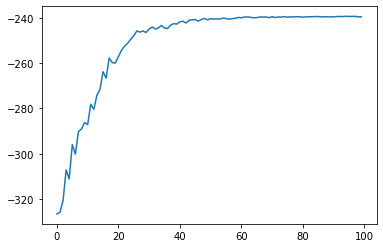

In [13]:
optim_reinforce = SLCVI(tree_log_probs,deepcopy(theta),pop_size)

optim_reinforce.learn(batch_size=10,
                      iters=1000,
                      alpha=0.01,
                      method="reinforce",
                      record_every=10,
                      pop_size=pop_size)

print("final theta:",optim_reinforce.theta)
plt.plot(optim_reinforce.ELBO_ests)

iteration:  0
runtime: 0 mins
step size:  0.001
grad_norm estimate:  0.6484772749146124
ELBO estimate:  -239.5870778067228
100-sample ELBO estimate:  -239.10363447505836

iteration:  10
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.1179237448747512
ELBO estimate:  -239.62990748768618
100-sample ELBO estimate:  -239.16891595136047

iteration:  20
runtime: 0 mins
step size:  0.001
grad_norm estimate:  0.5981033903583092
ELBO estimate:  -239.3299492024409
100-sample ELBO estimate:  -239.19092036845925

iteration:  30
runtime: 0 mins
step size:  0.001
grad_norm estimate:  0.9661679905320153
ELBO estimate:  -239.62666127880973
100-sample ELBO estimate:  -239.24915458866548

iteration:  40
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.1546571573401934
ELBO estimate:  -239.4171639746188
100-sample ELBO estimate:  -239.20541843423146

iteration:  50
runtime: 0 mins
step size:  0.001
grad_norm estimate:  0.9351658637092574
ELBO estimate:  -239.6423550265631
100-sample ELBO

iteration:  480
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.0673829744084837
ELBO estimate:  -239.60551410616273
100-sample ELBO estimate:  -239.1503005133847

iteration:  490
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.6275792369673867
ELBO estimate:  -239.41828013027123
100-sample ELBO estimate:  -239.26867369528608

iteration:  500
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.0974888638360638
ELBO estimate:  -239.33363046960955
100-sample ELBO estimate:  -239.2668668246399

iteration:  510
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.0454815596092115
ELBO estimate:  -239.43768194172873
100-sample ELBO estimate:  -239.22894274865754

iteration:  520
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.1152758547330204
ELBO estimate:  -239.42795683802717
100-sample ELBO estimate:  -239.16821499218855

iteration:  530
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.351921368750319
ELBO estimate:  -239.30018591067517
100-sam

iteration:  960
runtime: 0 mins
step size:  0.001
grad_norm estimate:  0.9226598857289218
ELBO estimate:  -239.3844608875445
100-sample ELBO estimate:  -239.26287747132355

iteration:  970
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.1801469608682447
ELBO estimate:  -239.54139595349213
100-sample ELBO estimate:  -239.1515299228123

iteration:  980
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.1182656775873383
ELBO estimate:  -239.4669253106793
100-sample ELBO estimate:  -239.125681823987

iteration:  990
runtime: 0 mins
step size:  0.001
grad_norm estimate:  1.2034616275907972
ELBO estimate:  -239.2705865324514
100-sample ELBO estimate:  -239.19590027134655

final theta: Parameter containing:
tensor([[[ 0.0000,  0.0000,  0.0000],
         [-2.6687,  0.0000,  0.0000],
         [-2.4326, -2.2690,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [-0.8158,  0.0000,  0.0000],
         [-0.6808, -1.4706,  0.0000]]], requires_grad=True)


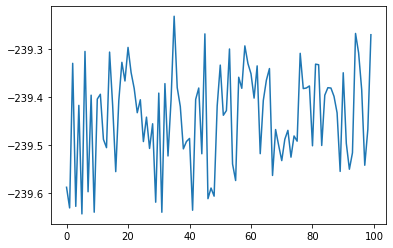

In [38]:
np.random.seed(0)
optim_VIMCO = SLCVI(tree_log_probs,deepcopy(theta),pop_size)

optim_VIMCO.learn(batch_size=10,
                  iters=1000,
                  alpha=0.001,
                  method="VIMCO",
                  record_every=10,
                  pop_size=pop_size)
print("final theta:",optim_VIMCO.theta)
plt.plot(optim_VIMCO.ELBO_ests)
theta = deepcopy(optim_VIMCO.theta)

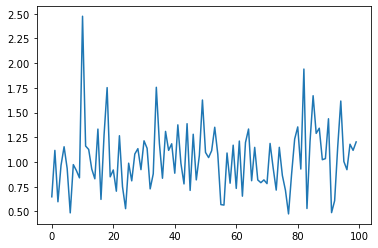

In [53]:
plt.plot(optim_VIMCO.grad_norms)

# TEST

In [88]:
optim_VIMCO.theta

Parameter containing:
tensor([[[ 0.0000,  0.0000,  0.0000],
         [-2.6687,  0.0000,  0.0000],
         [-2.4326, -2.2690,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [-0.8158,  0.0000,  0.0000],
         [-0.6808, -1.4706,  0.0000]]], requires_grad=True)

In [97]:
n_particles = 10
n_runs = 1000
h = 0.1
i = 1
j = 2
k = 0

with torch.no_grad():
    optim_VIMCO.theta[i,j,k] = optim_VIMCO.theta[i,j,k]-h
    print(optim_VIMCO.theta)
    f0s = np.array([logsumexp([optim_VIMCO.ELBO_reparam(1).detach() for i in range(n_particles)]) for _ in range(n_runs)])

    optim_VIMCO.theta[i,j,k] = optim_VIMCO.theta[i,j,k]+2*h
    print(optim_VIMCO.theta)
    f1s = np.array([logsumexp([optim_VIMCO.ELBO_reparam(1).detach() for i in range(n_particles)]) for _ in range(n_runs)])

    optim_VIMCO.theta[i,j,k] = optim_VIMCO.theta[i,j,k]-h

Parameter containing:
tensor([[[ 0.0000,  0.0000,  0.0000],
         [-2.6687,  0.0000,  0.0000],
         [-2.4326, -2.2690,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [-0.8158,  0.0000,  0.0000],
         [-0.7808, -1.4706,  0.0000]]], requires_grad=True)
Parameter containing:
tensor([[[ 0.0000,  0.0000,  0.0000],
         [-2.6687,  0.0000,  0.0000],
         [-2.4326, -2.2690,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [-0.8158,  0.0000,  0.0000],
         [-0.5808, -1.4706,  0.0000]]], requires_grad=True)


0.03951634233625498


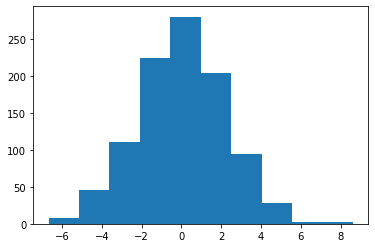

In [96]:
plt.hist((f1s-f0s)/h)
print(np.mean((f1s-f0s)/h))

In [94]:
from scipy.stats import ttest_1samp
ttest_1samp((f1s-f0s)/h,popmean=0.0)

Ttest_1sampResult(statistic=0.3959664622463884, pvalue=0.6922143207138763)

# Print out a random tree

In [40]:
optim = optim_VIMCO
theta = optim.theta

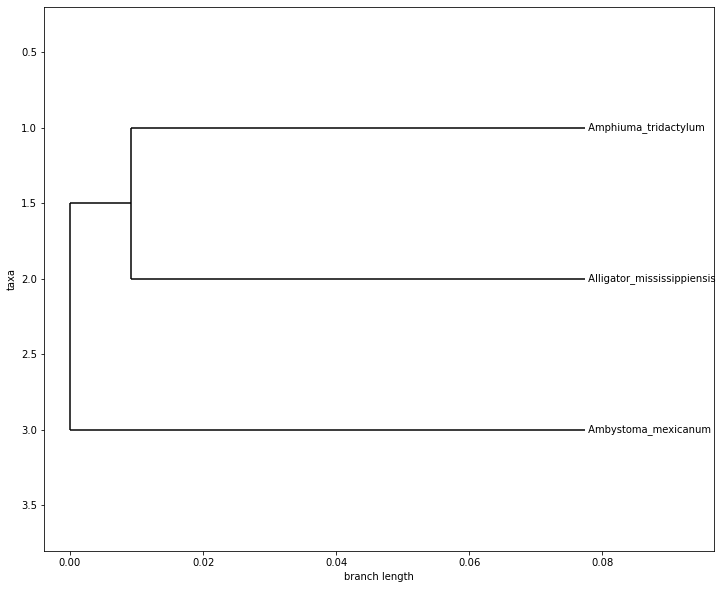

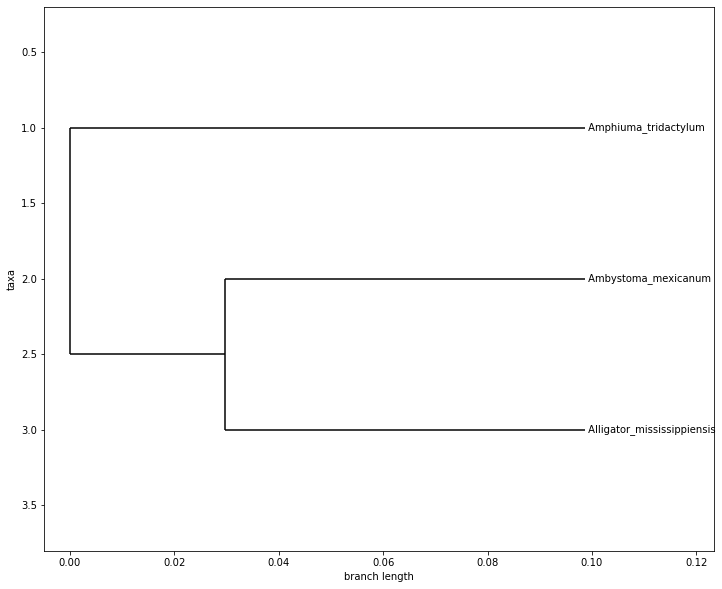

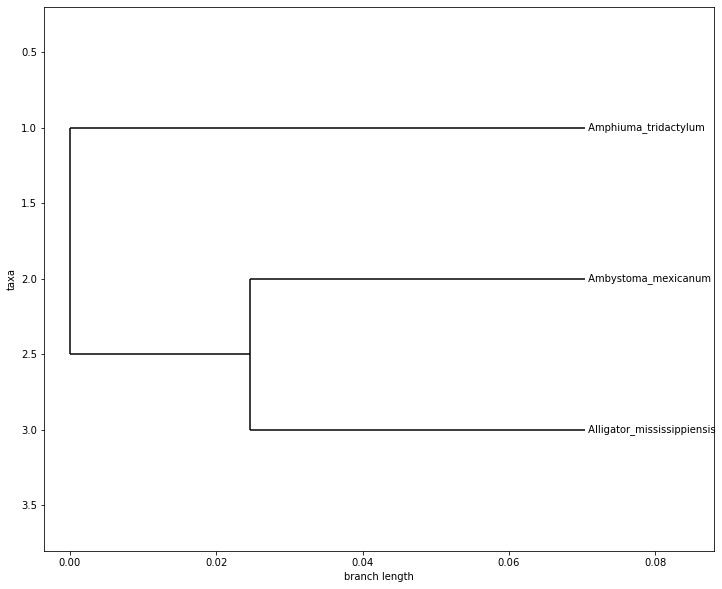

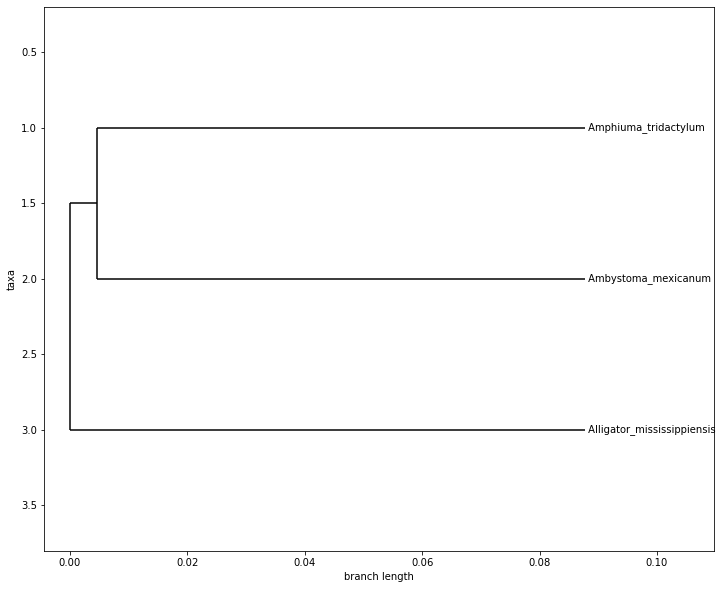

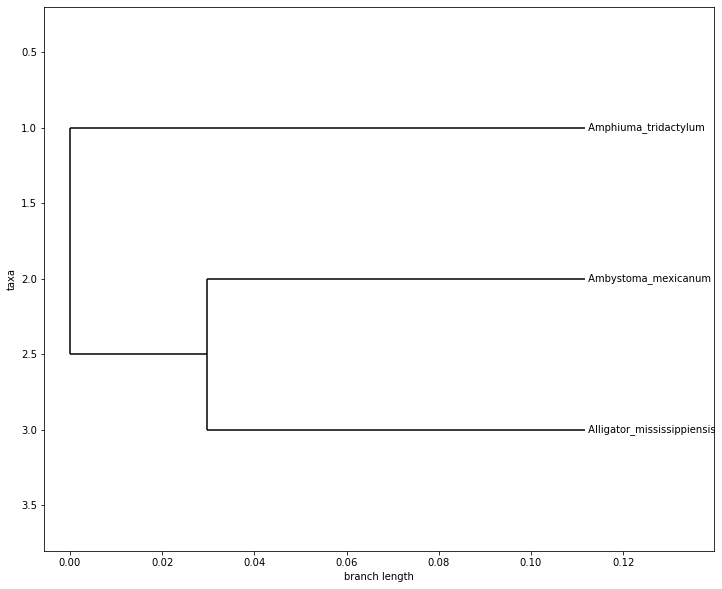

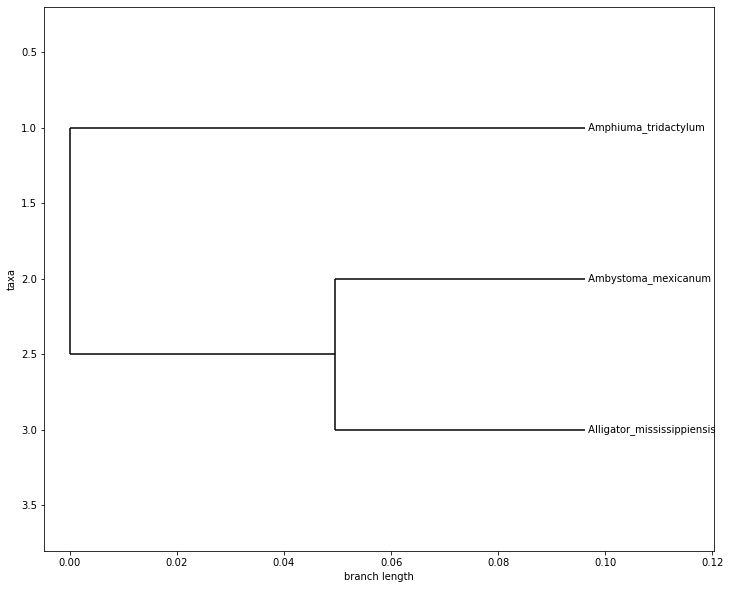

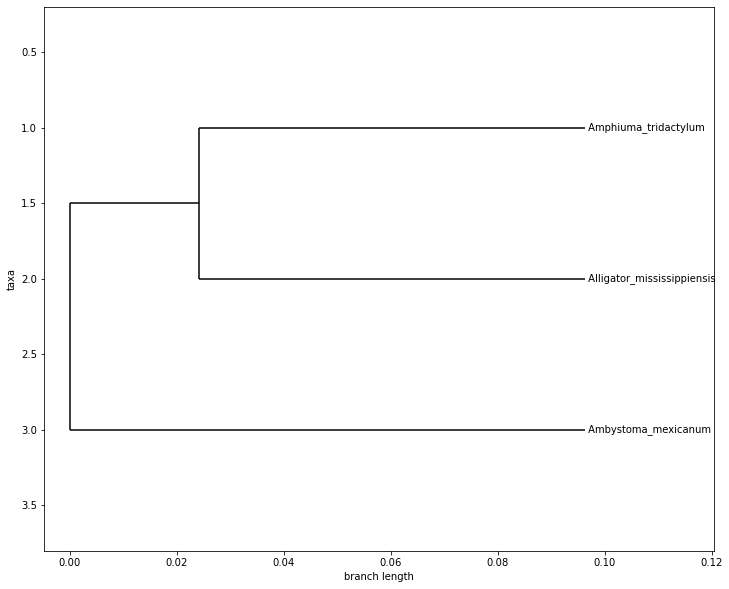

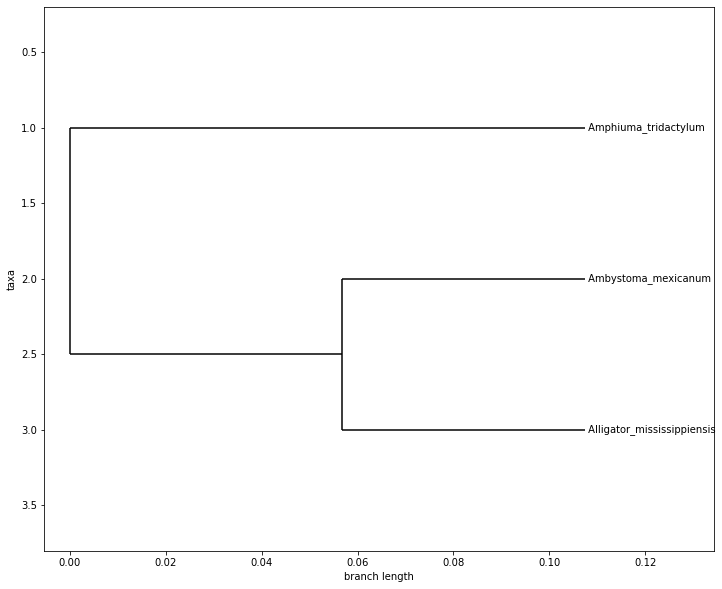

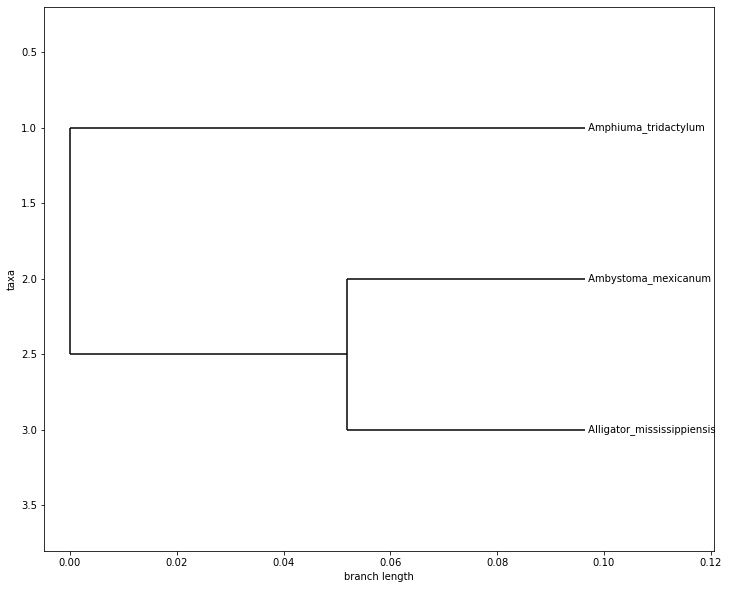

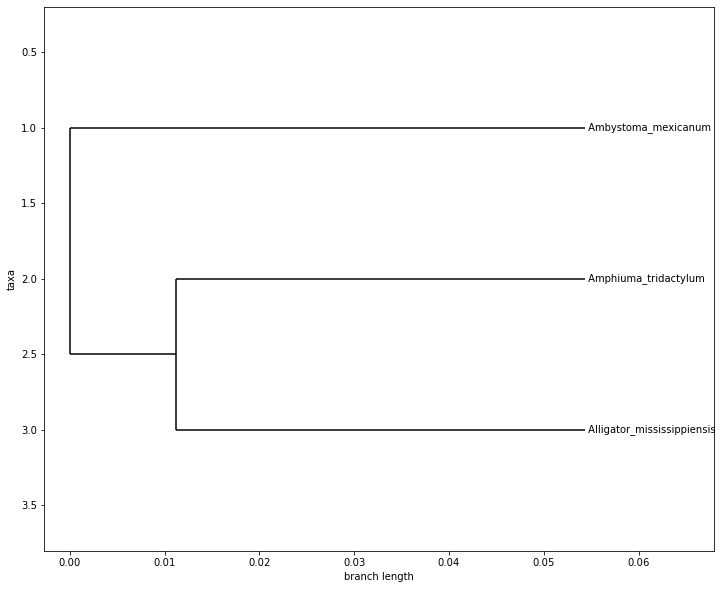

In [41]:
def write_newick(node):
    
    if node.children == []:
        return species[next(iter(node.leaves))] + ":" + str(node.parent.coal_time.item())
    elif node.parent is None:
        return "(" + write_newick(node.children[0]) + "," + write_newick(node.children[1]) + ")"
    else:
        bl = node.parent.coal_time.item() - node.coal_time.item()
        return "(" + write_newick(node.children[0]) + "," + write_newick(node.children[1]) + "):" + str(bl)

    
for _ in range(10):
    Z = torch.normal(mean=0.0,std=1.0,size=(n_species,n_species))
    log_times = torch.exp(theta[1])*Z+theta[0]
    log_times = log_times + torch.triu(torch.full((n_species,n_species), float("Inf")))

    tree = Tree(theta,log_times,tree_log_probs,
                pop_size=pop_size)


    treedata = write_newick(tree.nodes[-1])
    handle = StringIO(treedata)
    tree_to_draw = Phylo.read(handle, "newick")

    # Set up the plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(1, 1, 1)

    # Draw the phylogenetic tree
    Phylo.draw(tree_to_draw, axes=ax)
    fig.show()

# Estimate the marginal likelihood

In [42]:
tree = Tree(optim.theta,log_times,
            deepcopy(tree_log_probs),
            pop_size=pop_size)

In [43]:
theta

Parameter containing:
tensor([[[ 0.0000,  0.0000,  0.0000],
         [-2.6687,  0.0000,  0.0000],
         [-2.4326, -2.2690,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [-0.8158,  0.0000,  0.0000],
         [-0.6808, -1.4706,  0.0000]]], requires_grad=True)

In [44]:
n_exp = 100
n_samples = 100

priors = np.zeros(n_exp)
LL = np.zeros(n_exp)
MLL_all = np.zeros(n_exp)
ELBO_all = np.zeros(n_exp) 

for i in range(n_exp):

    if i % 10 == 0:
        print(i)
    
    MLL = np.zeros(n_samples)
    ELBO = np.zeros(n_samples)
    
    Zs = torch.normal(mean=0.0,std=1.0,size=(n_samples,n_species,n_species))

    for j,Z in enumerate(Zs):
        log_times = torch.exp(theta[1])*Z+theta[0]
        log_times = log_times + torch.triu(torch.full((n_species,n_species), float("Inf")))
        tree = Tree(optim.theta,log_times,
                    deepcopy(tree_log_probs),
                    pop_size=pop_size)
        
        MLL[j] = tree.log_p - tree.log_q
        ELBO[j] = tree.log_p - tree.log_q
    
    priors[i] = tree.log_prior
    LL[i] = tree.log_like
    MLL_all[i] = logsumexp(MLL) - np.log(n_samples)
    ELBO_all[i] = np.mean(ELBO)

0
10
20
30
40
50
60
70
80
90


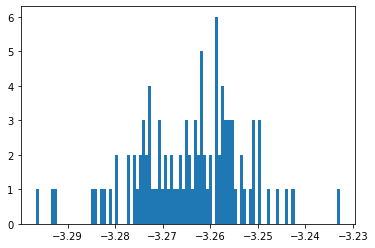

In [45]:
plt.hist(priors,bins = 100)
plt.show()

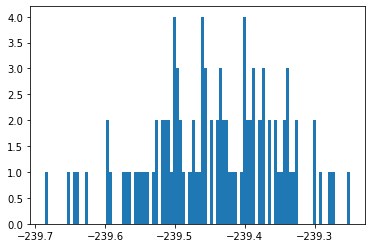

In [46]:
plt.hist(ELBO_all,bins = 100)
plt.show()

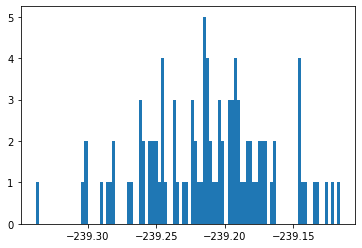

In [47]:
plt.hist(MLL_all,bins = 100)
plt.show()

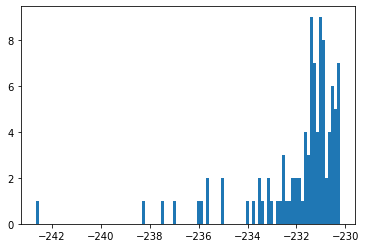

In [48]:
plt.hist(LL,bins = 100)
plt.show()

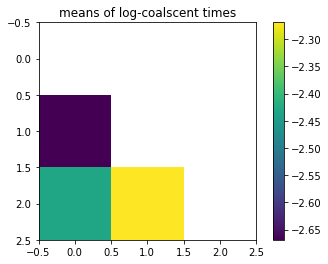

In [49]:
m = deepcopy(theta[0].detach())
m[np.triu_indices(m.shape[0])] = np.nan
plt.imshow(m)
plt.title("means of log-coalscent times")
plt.colorbar()

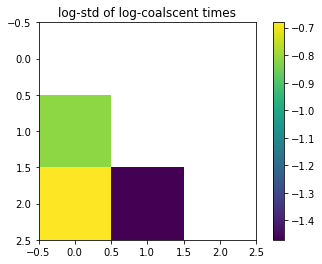

In [50]:
log_sig = deepcopy(theta[1].detach())
log_sig[np.triu_indices(log_sig.shape[0])] = np.nan
plt.imshow(log_sig)
plt.title("log-std of log-coalscent times")
plt.colorbar()

# Plot the likelihood surface for 3-taxa trees

In [51]:
def plot_q(theta,res):
    
    # select t lims from sampling 1000 trees
    min_time = np.min((-5*np.exp(theta[1].detach().numpy())+theta[0].detach().numpy())[np.tril(np.full((n_species), True),k=-1)])
    max_time = np.max(( 3*np.exp(theta[1].detach().numpy())+theta[0].detach().numpy())[np.tril(np.full((n_species), True),k=-1)])
    tlims = [min_time,max_time]

    #print(theta)
    log_p = np.zeros((3,res,res))
    log_q = np.zeros((3,res,res))
    ELBO = np.zeros((3,res,res))

    orders = [[0,1,2],[0,2,1],[1,2,0]]
    tau_labels = ['(({A},{B}),({A,B},{C}))',
                  '(({A},{C}),({A,C},{B}))',
                  '(({B},{C}),({A},{B,C})']

    for k,inds in enumerate(orders):

        time1s = np.linspace(tlims[0],tlims[1],res)
        time2s = np.linspace(tlims[0],tlims[1],res)

        for i,time1 in enumerate(time1s):
            for j,time2 in enumerate(time2s):

                if time1 > time2:
                    log_p[k,j,i] = -np.inf
                    log_q[k,j,i] = -np.inf

                else:
                    times = np.inf*torch.ones((3,3))

                    inds1 = [inds[x] for x in [0,1]]
                    inds2 = [inds[x] for x in [0,2]]
                    inds3 = [inds[x] for x in [1,2]]

                    times[max(inds1),min(inds1)] = time1
                    times[max(inds2),min(inds2)] = time2
                    times[max(inds3),min(inds3)] = time2+1

                    tree = Tree(theta,times,tree_log_probs,
                                pop_size=pop_size)

                    log_p[k,j,i] = tree.log_p
                    log_q[k,j,i] = tree.log_q
                    ELBO[k,j,i] = torch.exp(tree.log_q)*(tree.log_p - tree.log_q)
    log_p = log_p-logsumexp(log_p[~np.isnan(log_p)])+logsumexp(log_q[~np.isnan(log_q)])
    vmax = np.nanmax([log_p,log_q])

    i = 0
    plt.subplots(figsize = (20,12))
    for k in range(3):

        i += 1
        plt.subplot(3,3,i)

        plt.imshow(log_p[k], interpolation='nearest', origin='lower',
                   extent=[tlims[0],tlims[1],tlims[0],tlims[1]],vmin=vmax-6,vmax=vmax)
        plt.xlabel(r'$\log(t_1)$',fontsize = 16)
        plt.ylabel(r'$\log(t_2)$',fontsize = 16)
        plt.title(r'log(p), $\tau$ = %s' % tau_labels[k],fontsize = 16)
        plt.colorbar()

        plt.subplot(3,3,i+3)

        plt.imshow(log_q[k], interpolation='nearest', origin='lower',
                   extent=[tlims[0],tlims[1],tlims[0],tlims[1]],vmin=vmax-6,vmax=vmax)
        plt.xlabel(r'$\log(t_1)$',fontsize = 16)
        plt.ylabel(r'$\log(t_2)$',fontsize = 16)
        plt.title(r'log(q), $\tau$ = %s' % tau_labels[k],fontsize = 16)
        plt.colorbar()

    plt.show()
    return

REINFORCE:


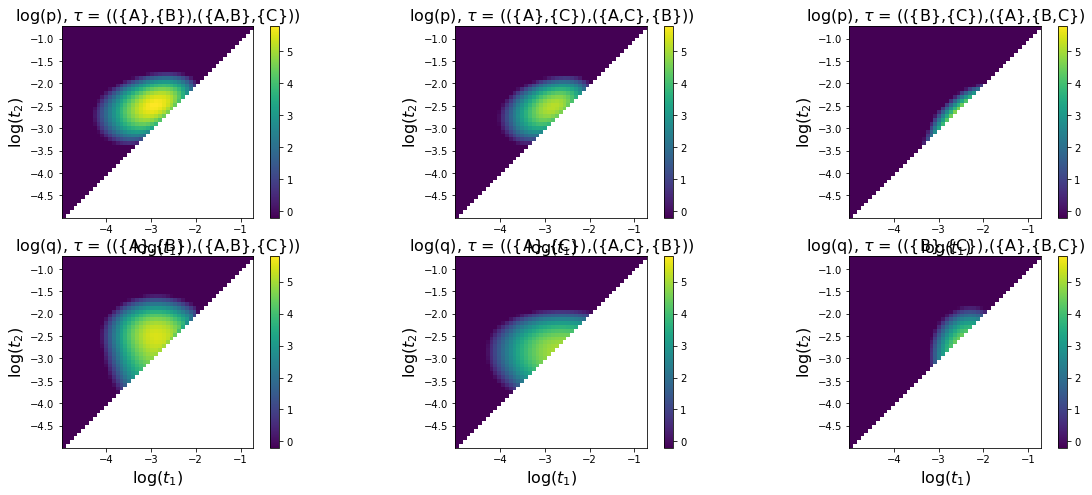

VIMCO:


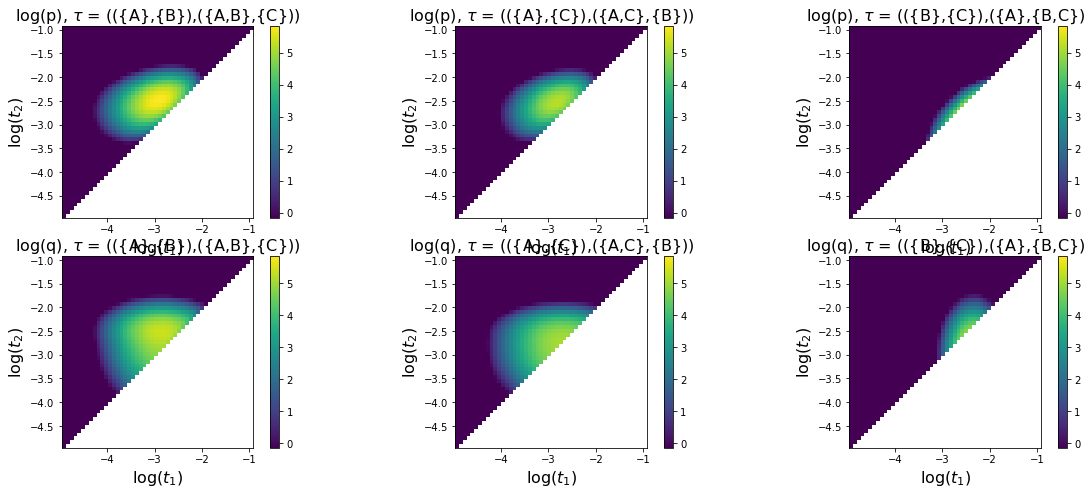

Reparam:


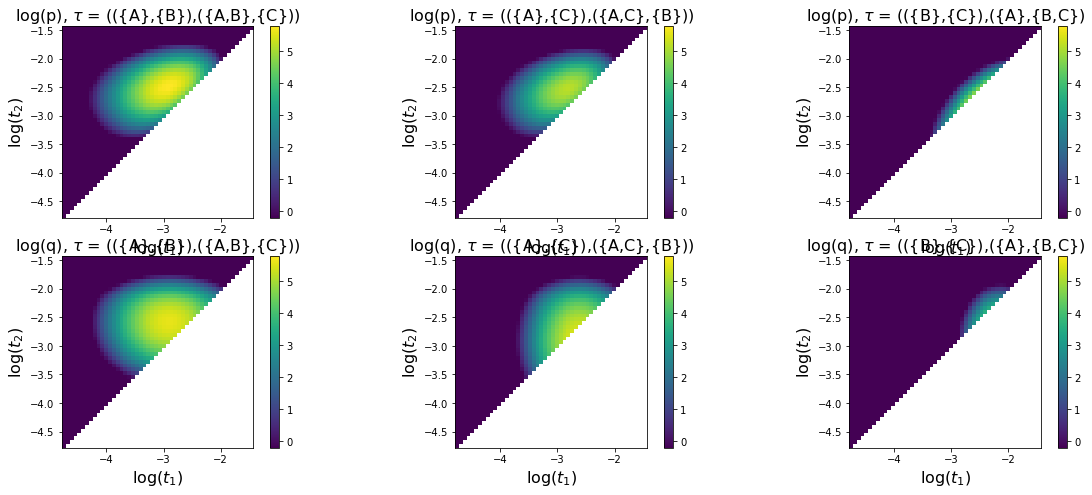

In [52]:
print("REINFORCE:")
plot_q(optim_reinforce.theta,res=50)
print("VIMCO:")
plot_q(optim_VIMCO.theta,res=50)
print("Reparam:")
plot_q(optim_reparam.theta,res=50)

# Visualize the boundary

In [ ]:
theta = optim.theta
res = 500

# select t lims from sampling 1000 trees
Z1 = 0
min_time = np.min((-5*np.exp(theta[1])+theta[0])[np.tril(np.full((n_species), True),k=-1)])
max_time = np.max(( 3*np.exp(theta[1])+theta[0])[np.tril(np.full((n_species), True),k=-1)])
tlims = [min_time,max_time]

#print(theta)
log_p = np.zeros((3,res))
log_q = np.zeros((3,res))
ELBO = np.zeros((3,res))

eps = 0.00001

orders = [[0,1,2],[0,2,1],[1,2,0]]
tau_labels = ['(({A},{B}),({A,B},{C}))',
              '(({A},{C}),({A,C},{B}))',
              '(({B},{C}),({A},{B,C})']

for k,inds in enumerate(orders):
    
    time1s = np.linspace(tlims[0],tlims[1],res)
    
    for i,time1 in enumerate(time1s):
        
        time2 = time1 + eps
                
        times = np.inf*np.ones((3,3))

        inds1 = [inds[x] for x in [0,1]]
        inds2 = [inds[x] for x in [0,2]]
        inds3 = [inds[x] for x in [1,2]]

        times[max(inds1),min(inds1)] = time1
        times[max(inds2),min(inds2)] = time2
        times[max(inds3),min(inds3)] = time2+1

        tree = Tree(theta,times,tree_log_probs,
                    pop_size=pop_size)

        log_p[k,i] = tree.log_p
        log_q[k,i] = tree.log_q
        ELBO[k,i] = np.exp(tree.log_q)*(tree.log_p - tree.log_q)

In [ ]:
np.max(np.exp(log_q.T))

In [ ]:
plt.plot(time1s,np.exp(log_q.T)*(log_p.T-log_q.T))
plt.show()

In [ ]:
plt.plot(time1s,log_q.T,'-.')
plt.show()

In [ ]:
theta = optim.theta
res = 200

# select t lims from sampling 1000 trees
Z1 = -3
Z2s = np.linspace(-5,5,res)
Z3s = np.linspace(-5,5,res)
tlims = [-5,5]

#print(theta)
log_p = np.zeros((res,res))
log_q = np.zeros((res,res))
ELBO = np.zeros((res,res))
    
for i,Z2 in enumerate(Z2s):
    for j,Z3 in enumerate(Z3s):

        Z = np.array([[np.inf,np.inf,np.inf],
                      [Z2    ,np.inf,np.inf],
                      [Z3    ,Z1   ,np.inf]])

        log_times = np.exp(theta[1])*Z+theta[0]

        tree = Tree(theta,log_times,tree_log_probs,
                    pop_size=pop_size)

        log_p[j,i] = tree.log_p
        log_q[j,i] = tree.log_q
        ELBO[j,i] = (tree.log_p-tree.log_q)


In [ ]:
#log_p = log_p-logsumexp(log_p[~np.isnan(log_p)])+logsumexp(log_q[~np.isnan(log_q)])
vmaxp = np.nanmax([log_p])
vmaxq = np.nanmax([log_q])
plt.subplots(figsize = (20,12))
    
plt.subplot(1,3,1)

plt.imshow(log_p, interpolation='nearest', origin='lower',
           extent=[tlims[0],tlims[1],tlims[0],tlims[1]],vmin=vmaxp-6,vmax=vmaxp)
plt.xlabel(r'$Z_{ac}$',fontsize = 16)
plt.ylabel(r'$Z_{bc}$',fontsize = 16)
plt.title(r'log(p), $\tau$ = %s' % tau_labels[k],fontsize = 16)
plt.colorbar()

plt.subplot(1,3,2)

plt.imshow(log_q, interpolation='nearest', origin='lower',
           extent=[tlims[0],tlims[1],tlims[0],tlims[1]],vmin=vmaxq-6,vmax=vmaxq)
plt.xlabel(r'$Z_{ac}$',fontsize = 16)
plt.ylabel(r'$Z_{bc}$',fontsize = 16)
plt.title(r'log(q), $\tau$ = %s' % tau_labels[k],fontsize = 16)
plt.colorbar()
    
plt.subplot(1,3,3)

plt.imshow(ELBO, interpolation='nearest', origin='lower',
           extent=[tlims[0],tlims[1],tlims[0],tlims[1]])
plt.xlabel(r'$Z_{ac}$',fontsize = 16)
plt.ylabel(r'$Z_{bc}$',fontsize = 16)
plt.title(r'ELBO, $\tau$ = %s' % tau_labels[k],fontsize = 16)
plt.colorbar()
    
plt.show()

In [ ]:
theta

# Evaluate gradient of the ELBO

In [ ]:
genomes

In [34]:
optim.theta

Parameter containing:
tensor([[[ 0.0000,  0.0000,  0.0000],
         [-2.6774,  0.0000,  0.0000],
         [-2.4284, -2.3183,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000],
         [-0.8407,  0.0000,  0.0000],
         [-0.6732, -1.5253,  0.0000]]], requires_grad=True)

In [ ]:
np.exp(-1.6)

In [ ]:
# select t lims from plus or minus three standard deviations
min_time = np.min((-5*np.exp(optim.theta[1])+optim.theta[0])[np.tril(np.full((n_species), True),k=-1)])
max_time = np.max(( 3*np.exp(optim.theta[1])+optim.theta[0])[np.tril(np.full((n_species), True),k=-1)])
tlims = [min_time,max_time]

def ELBO_no_reparam(theta,res_no_reparam):

    ELBO = 0
    orders = [[0,1,2],[0,2,1],[1,2,0]]

    for k,inds in enumerate(orders):

        time1s = np.linspace(tlims[0],tlims[1],res_no_reparam)
        time2s = np.linspace(tlims[0],tlims[1],res_no_reparam)

        for i,time1 in enumerate(time1s):
            for j,time2 in enumerate(time2s):

                if time1 < time2:
                    
                    times = np.inf*np.ones((3,3))

                    inds1 = [inds[x] for x in [0,1]]
                    inds2 = [inds[x] for x in [0,2]]
                    inds3 = [inds[x] for x in [1,2]]

                    times[max(inds1),min(inds1)] = time1
                    times[max(inds2),min(inds2)] = time2
                    times[max(inds3),min(inds3)] = time2+1
                    
                    tree = Tree(theta,times,tree_log_probs,
                                pop_size=pop_size)

                    ELBO_hat = np.exp(tree.log_q)*(tree.log_p - tree.log_q)
                    
                    if not np.isnan(ELBO_hat):
                        
                        if i == 0:
                            length = 0
                        else:
                            length = np.exp(time1s[i]) - np.exp(time1s[i-1])
                            
                        if j == 0:
                            width = 0
                        else:
                            width = np.exp(time2s[j]) - np.exp(time2s[j-1])
                        
                        ELBO_hat = ELBO_hat*length*width
                        ELBO = ELBO + ELBO_hat
                    
    return ELBO

In [ ]:
ELBO_no_reparam(optim.theta,500)

In [ ]:
ELBO_no_reparam(optim.theta,300)

In [ ]:
ELBO_no_reparam(optim.theta,200)

In [ ]:
ELBO_no_reparam(optim.theta,100)

In [ ]:
grad(lambda theta: ELBO_no_reparam(theta,100))(optim.theta)

In [ ]:
grad(lambda theta: ELBO_no_reparam(theta,200))(optim.theta)

In [ ]:
grad(lambda theta: ELBO_no_reparam(theta,300))(optim.theta)

In [ ]:
grad(lambda theta: ELBO_no_reparam(theta,500))(optim.theta)

# Reparameterize and see if the LOTUS applies

In [ ]:
res_reparam = 50

min_Z = -3
max_Z = 3

def ELBO_reparam(theta):
    
    ELBO = 0
    
    Z1s = np.linspace(min_Z,max_Z,res_reparam)
    Z2s = np.linspace(min_Z,max_Z,res_reparam)
    Z3s = np.linspace(min_Z,max_Z,res_reparam)
    
    for i,Z1 in enumerate(Z1s):
        for j,Z2 in enumerate(Z2s):
            for k,Z3 in enumerate(Z3s):
        
                Z = np.array([[np.inf,np.inf,np.inf],
                              [Z1    ,np.inf,np.inf],
                              [Z2    ,Z3    ,np.inf]])

                log_times = np.exp(theta[1])*Z+theta[0]

                tree = Tree(theta,log_times,tree_log_probs,
                            pop_size=pop_size)

                density = np.product(norm.pdf([Z1,Z2,Z3]))*((max_Z-min_Z)/res_reparam)**3

                ELBO_hat = density*(tree.log_p - tree.log_q)
        
                if not np.isnan(ELBO_hat):
                    ELBO = ELBO + ELBO_hat
                    
    return ELBO

In [ ]:
ELBO_reparam(optim.theta)

In [ ]:
grad(ELBO_reparam)(optim.theta)

# See if we can replace integration with sampling

In [ ]:
n_samples = 10000

# sample trees
Z1s = np.random.normal(size=n_samples)
Z2s = np.random.normal(size=n_samples)
Z3s = np.random.normal(size=n_samples)

def ELBO_reparam_sample(theta):
    
    ELBO = 0
    
    for Z1,Z2,Z3 in zip(Z1s,Z2s,Z3s):
        
        Z = np.array([[np.inf,np.inf,np.inf],
                      [Z1    ,np.inf,np.inf],
                      [Z2    ,Z3    ,np.inf]])

        log_times = np.exp(theta[1])*Z+theta[0]

        tree = Tree(theta,log_times,tree_log_probs,
                    pop_size=pop_size)

        density = 1/n_samples

        ELBO_hat = density*(tree.log_p - tree.log_q)

        if not np.isnan(ELBO_hat):
            ELBO = ELBO + ELBO_hat
                    
    return ELBO

print(ELBO_reparam_sample(optim.theta))
print(grad(ELBO_reparam_sample)(optim.theta))

# See if the sum of the gradients is the gradient of the sum

In [ ]:
res_reparam = 25

min_Z = -3
max_Z = 3

grad_ELBO_reparam = np.zeros_like(optim.theta)

Z1s = np.linspace(min_Z,max_Z,res_reparam)
Z2s = np.linspace(min_Z,max_Z,res_reparam)
Z3s = np.linspace(min_Z,max_Z,res_reparam)

for i,Z1 in enumerate(Z1s):
    for j,Z2 in enumerate(Z2s):
        for k,Z3 in enumerate(Z3s):

            Z = np.array([[np.inf,np.inf,np.inf],
                          [Z1    ,np.inf,np.inf],
                          [Z2    ,Z3    ,np.inf]])
            
            def ELBO_reparam_local(theta0):
                log_times = np.exp(theta0[1])*Z+theta0[0]
                tree = Tree(theta0,log_times,tree_log_probs,
                            pop_size=pop_size)
                return tree.log_p - tree.log_q

            grad_ELBO_hat = grad(ELBO_reparam_local)(optim.theta)
            density = np.product(norm.pdf([Z1,Z2,Z3]))*((max_Z-min_Z)/res_reparam)**3

            grad_ELBO_hat = density*grad_ELBO_hat

            if not np.isnan(grad_ELBO_hat).all():
                grad_ELBO_reparam = grad_ELBO_reparam + grad_ELBO_hat

In [ ]:
print(grad_ELBO_reparam)

# Plot both ELBOs as theta[0,2,0] changes

In [ ]:
h = 0.5
np.linspace(optim.theta[0,2,0]-h,optim.theta[0,2,0]+h,2)

In [ ]:
h = 0.1
thetas = np.linspace(optim.theta[0,2,0]-h,optim.theta[0,2,0]+h,3)

grad_ELBOS_reparam = []
grad_ELBOS_no_reparam = []

ELBOS_reparam = []
ELBOS_no_reparam = []

for theta in thetas:
    print(theta)
    
    theta0 = deepcopy(optim.theta)
    theta0[0,2,0] = theta
    
    ELBOS_reparam.append(ELBO_reparam(theta0))
    print("ELBO reparam:",ELBOS_reparam[-1])
    
    ELBOS_no_reparam.append(ELBO_no_reparam(theta0,500))
    print("ELBO no reparam:",ELBOS_no_reparam[-1])
    
    #grad_ELBOS_reparam.append(grad(ELBO_reparam)(theta0))
    #print("grad ELBO reparam:",grad_ELBOS_reparam[-1])
    
    #grad_ELBOS_no_reparam.append(grad(ELBO_no_reparam)(theta0))
    #print("grad ELBO no reparam:",grad_ELBOS_no_reparam[-1])
    
    print("")

In [ ]:
plt.plot(thetas,ELBOS_reparam)
plt.show()
plt.plot(thetas,ELBOS_no_reparam)
plt.show()

plt.plot(thetas,[x[0,2,0] for x in grad_ELBOS_reparam])
plt.show()
plt.plot(thetas,[x[0,2,0] for x in grad_ELBOS_no_reparam])
plt.show()

In [ ]:
h = 0.5
thetas = np.linspace(optim.theta[0,1,0]-h,optim.theta[0,1,0]+h,5)

grad_ELBOS_reparam = []
grad_ELBOS_no_reparam = []

ELBOS_reparam = []
ELBOS_no_reparam = []

for theta in thetas:
    print(theta)
    
    theta0 = deepcopy(optim.theta)
    theta0[0,1,0] = theta
    
    ELBOS_reparam.append(ELBO_reparam(theta0))
    print("ELBO reparam:",ELBOS_reparam[-1])
    
    ELBOS_no_reparam.append(ELBO_no_reparam(theta0))
    print("ELBO no reparam:",ELBOS_no_reparam[-1])
    
    grad_ELBOS_reparam.append(grad(ELBO_reparam)(theta0))
    print("grad ELBO reparam:",grad_ELBOS_reparam[-1])
    
    grad_ELBOS_no_reparam.append(grad(ELBO_no_reparam)(theta0))
    print("grad ELBO no reparam:",grad_ELBOS_no_reparam[-1])
    
    print("")

In [ ]:
plt.plot(thetas,ELBOS_reparam)
plt.show()
plt.plot(thetas,ELBOS_no_reparam)
plt.show()

plt.plot(thetas,[x[0,1,0] for x in grad_ELBOS_reparam])
plt.show()
plt.plot(thetas,[x[0,1,0] for x in grad_ELBOS_no_reparam])
plt.show()

# Finally, see if we can move the sampling outside

In [ ]:
n_samples = 1000

# select t lims from sampling 1000 trees
min_Z = -3
max_Z = 3
    
grad_ELBO = np.zeros_like(optim.theta)

Z1s = np.random.normal(size=n_samples)
Z2s = np.random.normal(size=n_samples)
Z3s = np.random.normal(size=n_samples)

for Z1,Z2,Z3 in zip(Z1s,Z2s,Z3s):

    Z = np.array([[np.inf,np.inf,np.inf],
                  [Z1    ,np.inf,np.inf],
                  [Z2    ,Z3    ,np.inf]])

    def ELBO_reparam_sample_local(theta0):
        times = np.exp(theta0[1])*Z+theta0[0]
        tree = Tree(theta0,times,genomes,
                    pop_size=pop_size)
        return tree.log_p - tree.log_q

    grad_ELBO_hat = grad(ELBO_reparam_local)(optim.theta)
    density = 1/n_samples

    grad_ELBO_hat = density*grad_ELBO_hat

    if not np.isnan(grad_ELBO_hat).all():
        grad_ELBO = grad_ELBO + grad_ELBO_hat
                
print(grad_ELBO)

# See if we are actually sampling from Q when we do this

In [ ]:
plt.hist([x[1,1,0] for x in grad_thetas])

In [ ]:
theta

In [ ]:
times

In [ ]:
t1s = []
t2s = []

for _ in range(10000):
    
    # draw times
    Z = np.random.normal(np.ones_like(optim.theta[0]))
    times = np.exp(optim.theta[1])*Z+optim.theta[0]
    maxi = np.max(times)
    times = times + np.triu(np.ones_like(optim.theta[0])*maxi)
    
    # find t1 and t2
    t1 = np.min(times)
    t2 = np.min(times[times != t1])
    
    t1s.append(t1)
    t2s.append(t2)
    
    last_coal = {0,1,2}
    last_coal.remove(np.nonzero(times == t1)[0][0])
    last_coal.remove(np.nonzero(times == t1)[1][0])

In [ ]:
plt.hist(t2s,bins = 100)